# Real Data example  - Experimental p-values

About Dataset:

Column 1 - element name (consider each line as a separate element or a gene)

Column 2 - P-value obtained for  expression level through a method called MPRA (Massively parallel Reporter Assay)

Column 3 -  P-value obtained for  expression level through a method called STARR-seq (self transcribing active regulatory region sequencing)

Column 4 and 5 - FDR adjusted P-values (I used FDR method in R and adjusted the raw P-values for my own purpose)

Column 6 - signifies if its a gene/ element or a random sequence tested (this column has "CRE"s "Random"s )

CRE - means it is a actual element we tested.

Random - means a random genomic sequence we tested. (in order to get an understanding on the level of significance as opposed to actual elements)

## Initial Dataset setting up

### Importing Dataset

In [1]:
import pandas as pd

# Opening the file in read mode 
with open('experimental_pvalues.txt', 'r') as file:
    # Read the entire content of the file
    content = file.read()

# Split the content into lines
lines = content.splitlines()

# Split each line into columns (assuming a space delimiter)
table_data = [line.split() for line in lines]
colnames = lines[0].split()

# Create a DataFrame using pandas
df = pd.DataFrame(table_data[1:], columns=colnames)

# Display the DataFrame
print(df)
df.describe()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19096\119775796.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


             element p.value.MPRA p.value.STARR fdr_p.value.MPRA  \
0        ACTB:3UTR_2  0.383186164   0.639514183       0.81988995   
1        ACTB:3UTR_3  0.652607374   0.064364231      0.914348673   
2        ACTB:3UTR_4  0.314111444   0.166633162      0.752873902   
3      APPBP2:3UTR_0  0.667742535   0.773624946      0.917927293   
4      APPBP2:3UTR_1  0.503343772   0.863116965      0.879989991   
...              ...          ...           ...              ...   
10719      rdm_n:296  0.790804764   0.333753644      0.926517846   
10720      rdm_n:297  0.775545088   0.810952177      0.922700946   
10721      rdm_n:298  0.527098086   0.891224002      0.886821443   
10722      rdm_n:299  0.003340824   0.685395455      0.022142765   
10723      rdm_n:300  0.482111738   0.658419429        0.8731719   

      fdr_p.value.STARR    Type  
0           0.915449851     CRE  
1           0.446181004     CRE  
2            0.74969229     CRE  
3           0.920709145     CRE  
4           0

,element,p.value.MPRA,p.value.STARR,fdr_p.value.MPRA,fdr_p.value.STARR,Type
count,10724,10724,10724,10724,10724,10724
unique,10724,10529,10713,4600,2720,2
top,ACTB:3UTR_2,0,0,0.918232947,0.915449851,CRE
freq,1,145,5,827,4591,10186


Counts of data from each method

In [15]:
T_CRE = sum(df['Type']=="CRE")
T_Random = sum(df['Type']=="Random")
print(f"CRE:{T_CRE}\nRandom:{T_Random}")

CRE:10186
Random:538


### Bar Chart

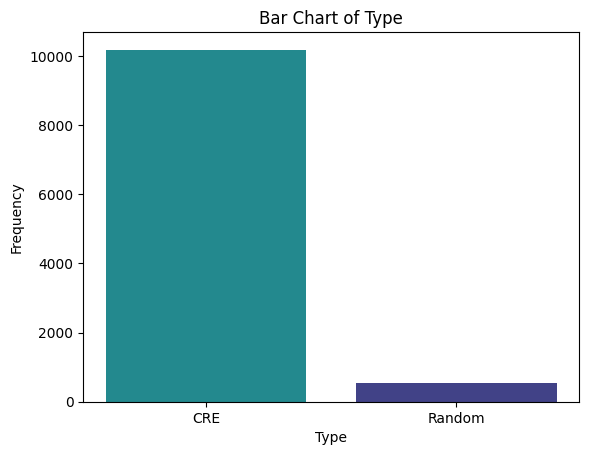

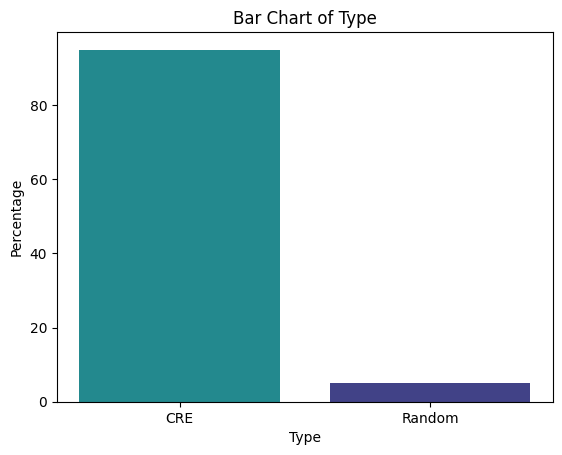

In [2]:
def draw_bar_chart(categories, values, title='Bar Chart', xlabel='Categories', ylabel='Values'):
    import matplotlib.pyplot as plt
    """
    Draw a bar chart using user-defined function.

    Parameters:
        categories (list): List of category labels.
        values (list): List of corresponding values for each category.
        title (str): Title of the chart (default is 'Bar Chart').
        xlabel (str): Label for the x-axis (default is 'Categories').
        ylabel (str): Label for the y-axis (default is 'Values').
    """
    colors = [plt.cm.viridis(120),plt.cm.viridis(50)]
    plt.bar(categories, values, color=colors)
    plt.title(title)
    plt.xlabel(xlabel)
    #plt.yticks(range(0, 110,10)) #for percentage
    plt.ylabel(ylabel)
    plt.show()


T_CRE = sum(df['Type']=="CRE")
T_Random = sum(df['Type']=="Random")
Total = T_CRE + T_Random

draw_bar_chart(['CRE','Random'], [T_CRE,T_Random], title='Bar Chart of Type', xlabel='Type', ylabel='Frequency')


P_CRE = sum(df['Type']=="CRE")*100/Total
P_Random = sum(df['Type']=="Random")*100/Total

draw_bar_chart(['CRE','Random'], [P_CRE,P_Random], title='Bar Chart of Type', xlabel='Type', ylabel='Percentage')


### Histogram

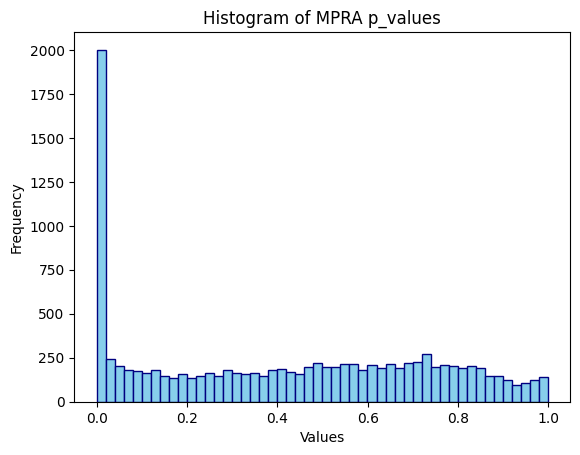

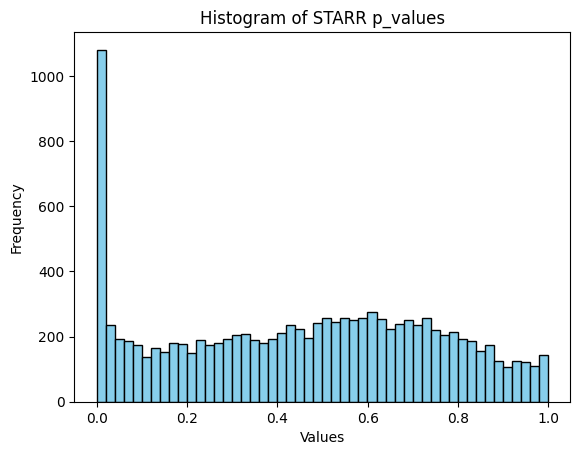

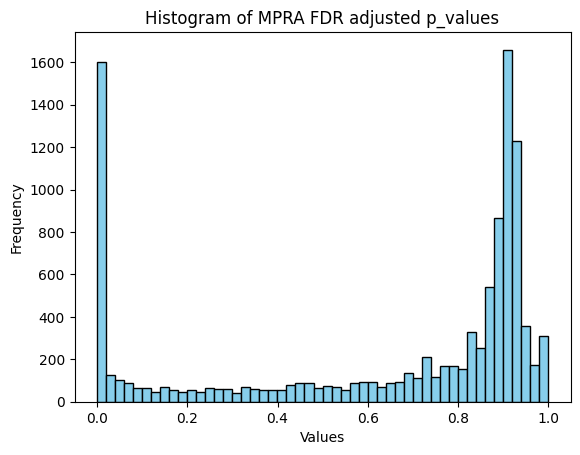

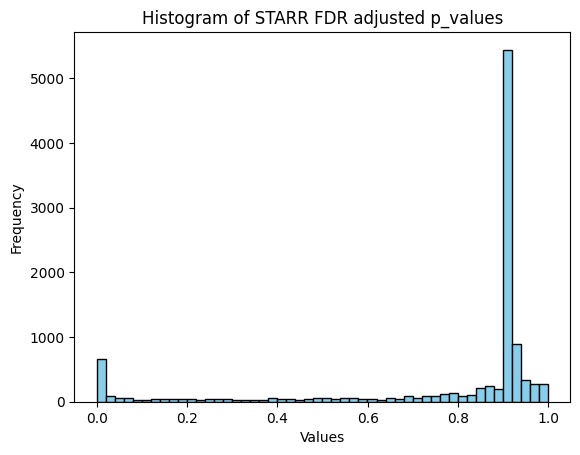

In [3]:
def draw_histogram(data, bins=10, color='skyblue', edgecolor='black', title='Histogram', xlabel='Values', ylabel='Frequency'):
    import matplotlib.pyplot as plt
    import numpy as np
    """
    Draw a histogram using user-defined function.

    Parameters:
        data (array-like): Input data for the histogram.
        bins (int or array, optional): Number of bins or bin edges. Default is 10.
        color (str, optional): Color of the bars. Default is 'skyblue'.
        edgecolor (str, optional): Color of the bar edges. Default is 'black'.
        title (str, optional): Title of the chart. Default is 'Histogram'.
        xlabel (str, optional): Label for the x-axis. Default is 'Values'.
        ylabel (str, optional): Label for the y-axis. Default is 'Frequency'.
    """
    plt.hist(data, bins=bins, color=color, edgecolor=edgecolor)

    # Customize the chart
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show the chart
    plt.show()


data1 = df['p.value.MPRA'].values.astype(float)
p_values_MPRA = data1
draw_histogram(data1, bins=50, color='skyblue', edgecolor='navy', title='Histogram of MPRA p_values', xlabel='Values', ylabel='Frequency')

data2 = df['p.value.STARR'].values.astype(float)
p_values_STARR = data1
draw_histogram(data2, bins=50, color='skyblue', edgecolor='black', title='Histogram of STARR p_values', xlabel='Values', ylabel='Frequency')

data3 = df['fdr_p.value.MPRA'].values.astype(float)
draw_histogram(data3, bins=50, color='skyblue', edgecolor='black', title='Histogram of MPRA FDR adjusted p_values', xlabel='Values', ylabel='Frequency')

data4 = df['fdr_p.value.STARR'].values.astype(float)
draw_histogram(data4, bins=50, color='skyblue', edgecolor='black', title='Histogram of STARR FDR adjusted p_values', xlabel='Values', ylabel='Frequency')


## Final p values

In [4]:
p_values_MPRA
p_values_STARR

m =len(p_values_MPRA+p_values_STARR)

In [5]:
MPRA_CRE_p_values = df[df['Type'] == 'CRE']['p.value.MPRA'].values.astype(float)
MPRA_Random_p_values = df[df['Type'] == 'Random']['p.value.MPRA'].values.astype(float)
STARR_CRE_p_values = df[df['Type'] == 'CRE']['p.value.STARR'].values.astype(float)
STARR_Random_p_values = df[df['Type'] == 'Random']['p.value.STARR'].values.astype(float)

print("MPRA_CRE_p_values: ",len(MPRA_CRE_p_values), "\nMPRA_Random_p_values: ",len(MPRA_Random_p_values))
print("STARR_CRE_p_values: ",len(MPRA_CRE_p_values), "\nSTARR_Random_p_values: ",len(MPRA_Random_p_values))

alpha = 0.05

uc_MPRA_CRE = sum(MPRA_CRE_p_values<alpha)
uc_MPRA_Rand = sum(MPRA_Random_p_values<alpha)
uc_STARR_CRE = sum(STARR_CRE_p_values<alpha)
uc_STARR_Rand = sum(STARR_Random_p_values<alpha)

print("\n\nSignificant MPRA_CRE_p_values: ",sum(MPRA_CRE_p_values<alpha),
"\nSignificant MPRA_Randon_p_values: ",sum(MPRA_Random_p_values<alpha),
"\nSignificant STARR_CRE_p_values: ",sum(STARR_CRE_p_values<alpha),
"\nSignificant STARR_Random_p_values: ",sum(STARR_Random_p_values<alpha))

MPRA_CRE_p_values:  10186 
MPRA_Random_p_values:  538
STARR_CRE_p_values:  10186 
STARR_Random_p_values:  538


Significant MPRA_CRE_p_values:  2248 
Significant MPRA_Randon_p_values:  89 
Significant STARR_CRE_p_values:  1336 
Significant STARR_Random_p_values:  67


In [6]:
import pandas as pd

#Dataframe summarizing methods
df1 = pd.DataFrame()
df1['Method'] = ['MPRA CRE', 'MPRA Random', 'STARR CRE', 'STARR Random']
df1['Uncorrected'] = [uc_MPRA_CRE, uc_MPRA_Rand, uc_STARR_CRE,uc_STARR_Rand]

print("Significant Results:")
print(df1)

Significant Results:
         Method  Uncorrected
0      MPRA CRE         2248
1   MPRA Random           89
2     STARR CRE         1336
3  STARR Random           67


### Correction methods

Benjamini-Hochberg method

In [7]:
MPRA_CRE_fdr_p_values = df[df['Type'] == 'CRE']['fdr_p.value.MPRA'].values.astype(float)
MPRA_Random_fdr_p_values = df[df['Type'] == 'Random']['fdr_p.value.MPRA'].values.astype(float)
STARR_CRE_fdr_p_values = df[df['Type'] == 'CRE']['fdr_p.value.STARR'].values.astype(float)
STARR_Random_fdr_p_values = df[df['Type'] == 'Random']['fdr_p.value.STARR'].values.astype(float)

print("MPRA_CRE_fdr_p_values: ",len(MPRA_CRE_fdr_p_values), "\nMPRA_Random_p_values: ",len(MPRA_Random_fdr_p_values))
print("STARR_CRE_fdr_p_values: ",len(MPRA_CRE_fdr_p_values), "\nSTARR_Random_p_values: ",len(MPRA_Random_fdr_p_values))

alpha = 0.05

bh_MPRA_CRE = sum(MPRA_CRE_fdr_p_values<alpha)
bh_MPRA_Rand = sum(MPRA_Random_fdr_p_values<alpha)
bh_STARR_CRE = sum(STARR_CRE_fdr_p_values<alpha)
bh_STARR_Rand = sum(STARR_Random_fdr_p_values<alpha)


print("\n\nSignificant MPRA_CRE_fdr_p_values: ",sum(MPRA_CRE_fdr_p_values<alpha),
"\nSignificant MPRA_Random_fdr_p_values: ",sum(MPRA_Random_fdr_p_values<alpha),
"\nSignificant STARR_CRE_fdr_p_values: ",sum(STARR_CRE_fdr_p_values<alpha),
"\nSignificant STARR_Random_fdr_p_values: ",sum(STARR_Random_fdr_p_values<alpha))


MPRA_CRE_fdr_p_values:  10186 
MPRA_Random_p_values:  538
STARR_CRE_fdr_p_values:  10186 
STARR_Random_p_values:  538


Significant MPRA_CRE_fdr_p_values:  1715 
Significant MPRA_Random_fdr_p_values:  63 
Significant STARR_CRE_fdr_p_values:  741 
Significant STARR_Random_fdr_p_values:  31


In [8]:
new_column_name = 'BH method'
new_column_values = [bh_MPRA_CRE, bh_MPRA_Rand,bh_STARR_CRE,bh_STARR_Rand]
df1[new_column_name] = new_column_values

print("\nSignificant Results:")
print(df1)


Significant Results:
         Method  Uncorrected  BH method
0      MPRA CRE         2248       1715
1   MPRA Random           89         63
2     STARR CRE         1336        741
3  STARR Random           67         31


Bonferroni Method

In [9]:
MPRA_CRE_p_values = df[df['Type'] == 'CRE']['p.value.MPRA'].values.astype(float)
MPRA_Random_p_values = df[df['Type'] == 'Random']['p.value.MPRA'].values.astype(float)
STARR_CRE_p_values = df[df['Type'] == 'CRE']['p.value.STARR'].values.astype(float)
STARR_Random_p_values = df[df['Type'] == 'Random']['p.value.STARR'].values.astype(float)

print("MPRA_CRE_p_values: ",len(MPRA_CRE_p_values), "\nMPRA_Random_p_values: ",len(MPRA_Random_p_values))
print("STARR_CRE_p_values: ",len(MPRA_CRE_p_values), "\nSTARR_Random_p_values: ",len(MPRA_Random_p_values))

alpha = 0.05/m

bonf_MPRA_CRE = sum(MPRA_CRE_p_values<alpha)
bonf_MPRA_Rand = sum(MPRA_Random_p_values<alpha)
bonf_STARR_CRE = sum(STARR_CRE_p_values<alpha)
bonf_STARR_Rand = sum(STARR_Random_p_values<alpha)

print("\n\nSignificant MPRA_CRE_p_values: ",sum(MPRA_CRE_p_values<alpha),
"\nSignificant MPRA_Random_p_values: ",sum(MPRA_Random_p_values<alpha),
"\nSignificant STARR_CRE_p_values: ",sum(STARR_CRE_p_values<alpha),
"\nSignificant STARR_Random_p_values: ",sum(STARR_Random_p_values<alpha))

MPRA_CRE_p_values:  10186 
MPRA_Random_p_values:  538
STARR_CRE_p_values:  10186 
STARR_Random_p_values:  538


Significant MPRA_CRE_p_values:  1031 
Significant MPRA_Random_p_values:  32 
Significant STARR_CRE_p_values:  379 
Significant STARR_Random_p_values:  12


In [10]:
new_column_name = 'Bonferroni'
new_column_values = [bonf_MPRA_CRE, bonf_MPRA_Rand,bonf_STARR_CRE,bonf_STARR_Rand]
df1[new_column_name] = new_column_values

print("\nSignificant Results:")
print(df1)


Significant Results:
         Method  Uncorrected  BH method  Bonferroni
0      MPRA CRE         2248       1715        1031
1   MPRA Random           89         63          32
2     STARR CRE         1336        741         379
3  STARR Random           67         31          12


In [11]:
#Weighted Bonferroni
import numpy as np

MPRA_CRE_p_values = df[df['Type'] == 'CRE']['p.value.MPRA'].values.astype(float)
MPRA_Random_p_values = df[df['Type'] == 'Random']['p.value.MPRA'].values.astype(float)
STARR_CRE_p_values = df[df['Type'] == 'CRE']['p.value.STARR'].values.astype(float)
STARR_Random_p_values = df[df['Type'] == 'Random']['p.value.STARR'].values.astype(float)

print("MPRA_CRE_p_values: ",len(MPRA_CRE_p_values), "\nMPRA_Random_p_values: ",len(MPRA_Random_p_values))
print("STARR_CRE_p_values: ",len(MPRA_CRE_p_values), "\nSTARR_Random_p_values: ",len(MPRA_Random_p_values))

alpha = 0.05/m

weighted_p = []
for p_values in [MPRA_CRE_p_values,MPRA_Random_p_values,STARR_CRE_p_values,STARR_Random_p_values]:
    # Generate hypothesis weights (Need to find a procedure to assign weights)
    random_numbers = np.random.rand(len(p_values))
    weight = random_numbers / np.sum(np.abs(random_numbers)) 

    # Combining p-values and weights into a 2D array
    data = np.column_stack((p_values, weight))

    # Separating p-values and weights
    p_values = data[:, 0]
    weight = data[:, 1]

    # Applying weights to p-values (e.g., multiply by weights)
    weighted_p_values = p_values * weight
    T = sum(weighted_p_values)
    weighted_p_values = weighted_p_values / T

    significant_p =  [p for p in weighted_p_values if p < alpha]
    sig_p= len(significant_p)
    weighted_p.append(sig_p)

print(weighted_p)
MPRA_CRE_wp_values = weighted_p[0]
MPRA_Random_wp_values = weighted_p[1]
STARR_CRE_wp_values = weighted_p[2]
STARR_Random_wp_values = weighted_p[3]


print("\n\nSignificant MPRA_CRE_p_values: ",MPRA_CRE_wp_values,
"\nSignificant MPRA_Random_p_values: ",MPRA_Random_wp_values,
"\nSignificant STARR_CRE_p_values: ",STARR_CRE_wp_values,
"\nSignificant STARR_Random_p_values: ",STARR_Random_wp_values)

MPRA_CRE_p_values:  10186 
MPRA_Random_p_values:  538
STARR_CRE_p_values:  10186 
STARR_Random_p_values:  538
[2202, 53, 1387, 24]


Significant MPRA_CRE_p_values:  2202 
Significant MPRA_Random_p_values:  53 
Significant STARR_CRE_p_values:  1387 
Significant STARR_Random_p_values:  24


In [ ]:
new_column_name = 'Weighted Bonf'
new_column_values = [MPRA_CRE_wp_values, MPRA_Random_wp_values,STARR_CRE_wp_values,STARR_Random_wp_values]
df1[new_column_name] = new_column_values

print("\nSignificant Results:")
print(df1)

Sidak Method

In [ ]:
MPRA_CRE_p_values = df[df['Type'] == 'CRE']['p.value.MPRA'].values.astype(float)
MPRA_Random_p_values = df[df['Type'] == 'Random']['p.value.MPRA'].values.astype(float)
STARR_CRE_p_values = df[df['Type'] == 'CRE']['p.value.STARR'].values.astype(float)
STARR_Random_p_values = df[df['Type'] == 'Random']['p.value.STARR'].values.astype(float)

print("MPRA_CRE_p_values: ",len(MPRA_CRE_p_values), "\nMPRA_Random_p_values: ",len(MPRA_Random_p_values))
print("STARR_CRE_p_values: ",len(MPRA_CRE_p_values), "\nSTARR_Random_p_values: ",len(MPRA_Random_p_values))

alpha = 0.05
alpha = 1 - (1-alpha)**(1/m)

sid_MPRA_CRE = sum(MPRA_CRE_p_values<alpha)
sid_MPRA_Rand = sum(MPRA_Random_p_values<alpha)
sid_STARR_CRE = sum(STARR_CRE_p_values<alpha)
sid_STARR_Rand = sum(STARR_Random_p_values<alpha)

print("\n\nSignificant MPRA_CRE_p_values: ",sum(MPRA_CRE_p_values<alpha),
"\nSignificant MPRA_Random_p_values: ",sum(MPRA_Random_p_values<alpha),
"\nSignificant STARR_CRE_p_values: ",sum(STARR_CRE_p_values<alpha),
"\nSignificant STARR_Random_p_values: ",sum(STARR_Random_p_values<alpha))

In [ ]:
new_column_name = 'Sidak'
new_column_values = [sid_MPRA_CRE,sid_MPRA_Rand,sid_STARR_CRE,sid_STARR_Rand]
df1[new_column_name] = new_column_values

print("\nSignificant Results:")
print(df1)